In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


array([[<AxesSubplot:xlabel='left', ylabel='left'>,
        <AxesSubplot:xlabel='satisfaction_level', ylabel='left'>,
        <AxesSubplot:xlabel='number_project', ylabel='left'>,
        <AxesSubplot:xlabel='average_montly_hours', ylabel='left'>,
        <AxesSubplot:xlabel='time_spend_company', ylabel='left'>,
        <AxesSubplot:xlabel='promotion_last_5years', ylabel='left'>],
       [<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>,
        <AxesSubplot:xlabel='satisfaction_level', ylabel='satisfaction_level'>,
        <AxesSubplot:xlabel='number_project', ylabel='satisfaction_level'>,
        <AxesSubplot:xlabel='average_montly_hours', ylabel='satisfaction_level'>,
        <AxesSubplot:xlabel='time_spend_company', ylabel='satisfaction_level'>,
        <AxesSubplot:xlabel='promotion_last_5years', ylabel='satisfaction_level'>],
       [<AxesSubplot:xlabel='left', ylabel='number_project'>,
        <AxesSubplot:xlabel='satisfaction_level', ylabel='number_project'>,
        <A

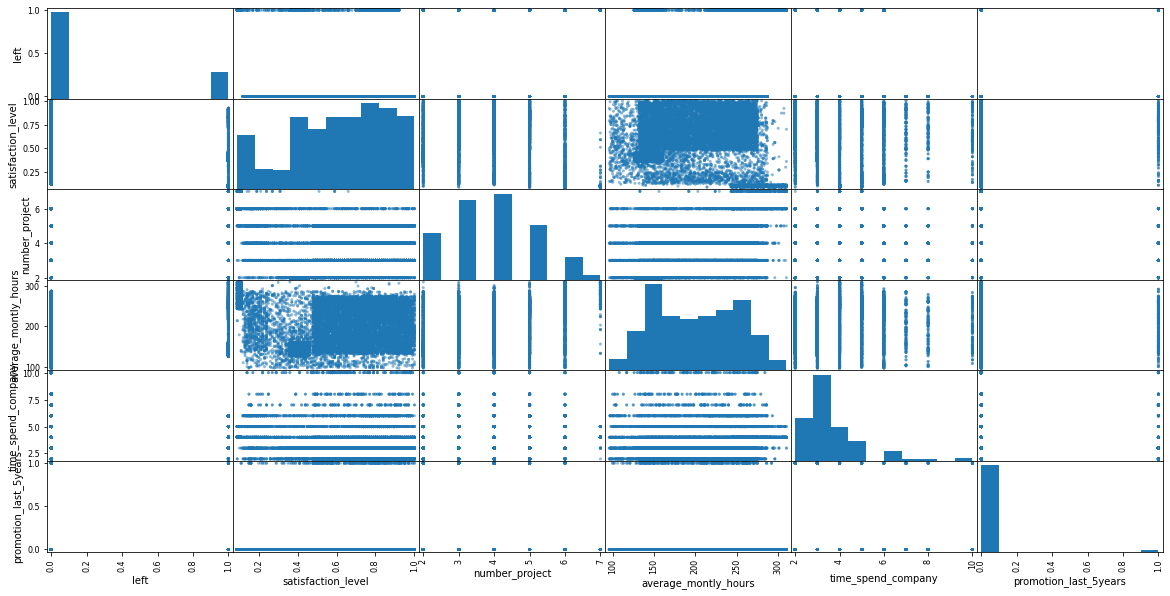

In [4]:
from pandas.plotting import scatter_matrix
atr = ["left", "satisfaction_level", "number_project", "average_montly_hours", "time_spend_company", "promotion_last_5years"]
scatter_matrix(df[atr], figsize = (20, 10))

<AxesSubplot:xlabel='salary'>

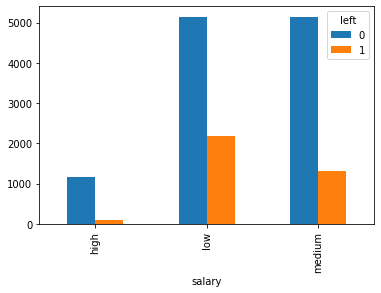

In [5]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

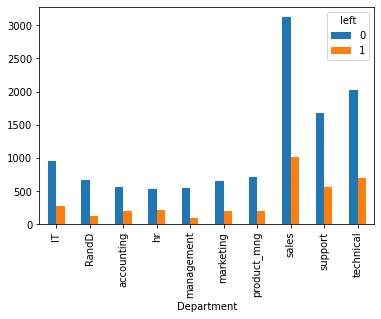

In [6]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [7]:
dummies = pd.get_dummies(df.salary)
dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [8]:
merged = pd.concat([df,dummies],axis='columns')
merged.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [9]:
final = merged.drop(['salary', 'medium'], axis='columns')
final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low
0,0.38,0.53,2,157,3,0,1,0,sales,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,0,1


In [26]:
X = final.drop(['last_evaluation', 'left','Department', 'Work_accident'], axis='columns')
X.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,promotion_last_5years,high,low
0,0.38,2,157,3,0,0,1
1,0.80,5,262,6,0,0,0
2,0.11,7,272,4,0,0,0
3,0.72,5,223,5,0,0,1
4,0.37,2,159,3,0,0,1


In [27]:
y = final.left

In [28]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=20)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [34]:
model.fit(X_train, y_train)

C:\Users\nampa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_predict = model.predict(X_test)

In [46]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [36]:
model.predict_proba(X_test)

array([[0.98941215, 0.01058785],
       [0.95901726, 0.04098274],
       [0.35847054, 0.64152946],
       ...,
       [0.96115058, 0.03884942],
       [0.34566178, 0.65433822],
       [0.79716535, 0.20283465]])

In [37]:
model.score(X_test, y_test)

0.7796666666666666

In [38]:
y_test

6493     0
3568     0
972      1
3260     0
671      1
        ..
13542    0
11146    0
3256     0
14443    1
4566     0
Name: left, Length: 3000, dtype: int64

In [39]:
X_test

,satisfaction_level,number_project,average_montly_hours,time_spend_company,promotion_last_5years,high,low
6493,0.77,5,162,3,0,1,0
3568,0.96,4,210,3,0,0,0
972,0.11,6,290,5,0,0,0
3260,0.58,3,220,3,0,0,0
671,0.11,6,264,4,0,0,1
...,...,...,...,...,...,...,...
13542,0.86,4,193,2,0,1,0
11146,0.95,3,224,2,0,0,1
3256,0.95,4,242,2,0,0,0
14443,0.11,6,244,4,0,0,1


## Manual calculations

In [40]:
model.coef_

array([[-4.01985408, -0.28343534,  0.00481253,  0.24987944, -0.82539218,
        -1.63398097,  0.52741091]])

In [22]:
model.intercept_

array([-2.29640602])

In [23]:
import math
def sigmoid(x):
    return 1/(1 + math.exp(-x))

In [41]:
def predict_fun(satisfaction_level, number_project, average_montly_hours, time_spend_company, promotion_last_5years, high, low ):
    z1 = (-4.02 * satisfaction_level) + (-0.007 * number_project) + (0.003 *average_montly_hours) + (0.212 * time_spend_company)\
    + (-0.825 * promotion_last_5years) + (-1.634 * high) + (0.527 * low) + (-1.888)
    y = sigmoid(z1)
    return y

In [45]:
satisfaction_level = 0.11
number_project = 6
average_montly_hours = 250
time_spend_company = 6
promotion_last_5years = 0
high = 0
low = 1
predict_fun(satisfaction_level, number_project, average_montly_hours, time_spend_company, promotion_last_5years, high, low )

0.5440852242381518